In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
from scripts import project_functions # This is called a relative import
dff = project_functions.load_and_process('/Users/Khalidmahmoud/Desktop/DATA301/project-group61-project/data/raw/world-happiness-report.csv')
dff

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2020,7.889,10.750,0.962,72.1,0.962,-0.116,0.164
1,Finland,2018,7.858,10.783,0.962,71.9,0.938,-0.127,0.199
2,Finland,2017,7.788,10.768,0.964,71.8,0.962,-0.002,0.192
3,Finland,2019,7.780,10.792,0.937,72.0,0.948,-0.052,0.195
4,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294
...,...,...,...,...,...,...,...,...,...
639,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
640,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831
641,Central African Republic,2016,2.693,6.785,0.290,44.9,0.624,0.033,0.859
642,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954


In [3]:
dff.shape

(644, 9)

In [4]:

print("The first 5 values are: ",dff.head())



The first 5 values are:    Country name  year  Life Ladder  Log GDP per capita  Social support  \
0      Finland  2020        7.889              10.750           0.962   
1      Finland  2018        7.858              10.783           0.962   
2      Finland  2017        7.788              10.768           0.964   
3      Finland  2019        7.780              10.792           0.937   
4  Switzerland  2019        7.694              11.136           0.949   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              72.1                         0.962      -0.116   
1                              71.9                         0.938      -0.127   
2                              71.8                         0.962      -0.002   
3                              72.0                         0.948      -0.052   
4                              74.4                         0.913       0.036   

   Perceptions of corruption  
0                 

In [5]:
print("The columns in this dataframe are: ",dff.columns)

The columns in this dataframe are:  Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [6]:
dff.nunique(axis=0)
dff.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,644.000000,644.000000,644.000000,644.000000,633.000000,641.000000,643.000000,604.000000
mean,2017.836957,5.551879,9.466618,0.816502,64.799485,0.789106,-0.011194,0.729303
std,1.346547,1.104355,1.145036,0.118613,6.847179,0.118495,0.153852,0.189425
min,2016.000000,2.375000,6.635000,0.290000,44.900000,0.304000,-0.335000,0.047000
25%,2017.000000,4.741750,8.552500,0.747500,59.600000,0.717000,-0.122000,0.676750
50%,2018.000000,5.570500,9.573000,0.842000,66.400000,0.812000,-0.036000,0.792500
75%,2019.000000,6.309000,10.460000,0.912000,69.600000,0.883000,0.080000,0.856250
max,2020.000000,7.889000,11.648000,0.985000,77.100000,0.985000,0.679000,0.969000


In [7]:
print("The unique countries in this dataframe are listed below: \n",dff['Country name'].unique())

The unique countries in this dataframe are listed below: 
 ['Finland' 'Switzerland' 'Denmark' 'Norway' 'Iceland' 'Netherlands'
 'Canada' 'Luxembourg' 'Sweden' 'Austria' 'New Zealand' 'Israel' 'Germany'
 'Australia' 'Ireland' 'United Kingdom' 'Costa Rica' 'Bahrain'
 'United Arab Emirates' 'Czech Republic' 'United States' 'Belgium' 'Malta'
 'Mexico' 'France' 'Slovenia' 'Guatemala' 'Uruguay' 'Chile' 'Panama'
 'Saudi Arabia' 'Slovakia' 'Italy' 'Taiwan Province of China' 'Spain'
 'Croatia' 'Nicaragua' 'El Salvador' 'Estonia' 'Brazil' 'Argentina'
 'Kosovo' 'Uzbekistan' 'Lithuania' 'Singapore' 'Colombia' 'Jamaica'
 'Cyprus' 'Kazakhstan' 'Philippines' 'Kyrgyzstan' 'Poland' 'Serbia'
 'Mauritius' 'Latvia' 'Trinidad and Tobago' 'Romania' 'Ecuador' 'Japan'
 'Kuwait' 'Portugal' 'Thailand' 'Hungary' 'Honduras'
 'Bosnia and Herzegovina' 'Mongolia' 'Dominican Republic' 'Peru'
 'South Korea' 'Greece' 'Bolivia' 'Turkmenistan' 'Russia' 'Pakistan'
 'Tajikistan' 'Belarus' 'Benin' 'Moldova' 'Paraguay' 'Chin

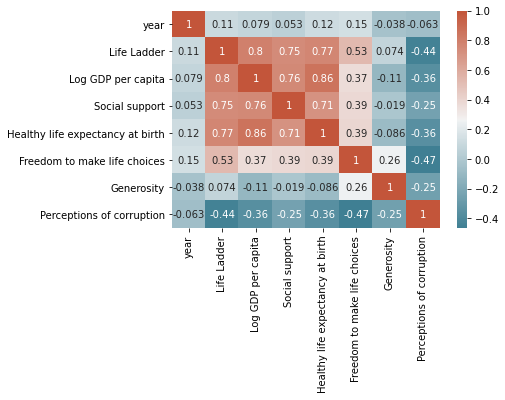

In [8]:
# calculate correlation matrix
corr = dff.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# below, obvious highest are seen between: 
# Log GDP per capita and life ladder,log gdp per capita and social support, log gdp per capita and healthy life expectancey at birth 
# the lowest are seen between year and the rest of the variables

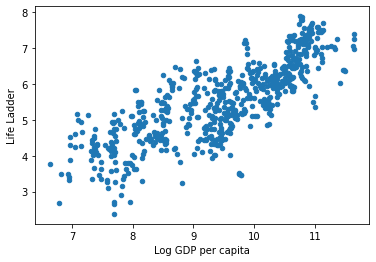

In [9]:
dff.plot(kind='scatter', x='Log GDP per capita', y='Life Ladder')
#correlation above is corroborated: increase in GDP correlates to an increase in life ladder, vice versa.

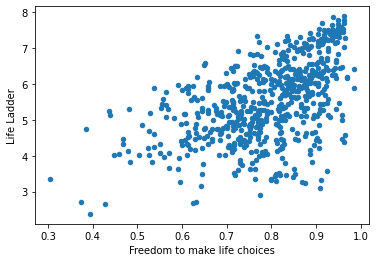

In [10]:
dff.plot(kind='scatter', x='Freedom to make life choices', y='Life Ladder')
#correlation above is corroborated: increase in Freedom to make life choices to an increase in life ladder, vice versa.

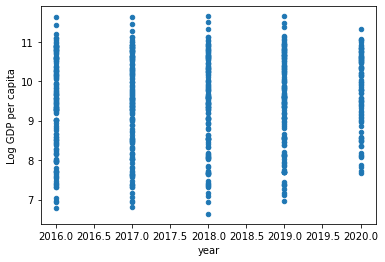

In [11]:
dff.plot(kind='scatter', x='year', y='Log GDP per capita')
# the max and min gdp per capita are seen at 2018 
# the peak gdp per capita is at 2018, while the highest min and lowest max is at 2020

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


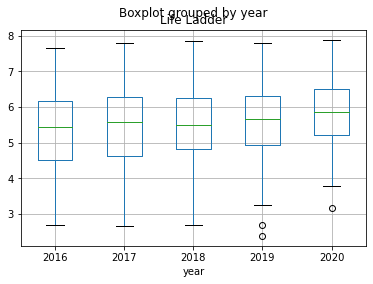

In [12]:
dff.boxplot('Life Ladder', 'year')
#highest min and max of life ladder are seen in 2020


/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


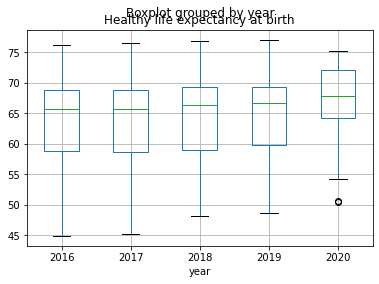

In [13]:
dff.boxplot('Healthy life expectancy at birth', 'year')
#average healthy life expectancy is relatively constant and is highest in 2020

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


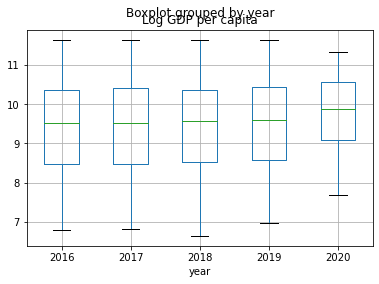

In [14]:
dff.boxplot('Log GDP per capita', 'year')
#average  log gdp per capita, as supported by the boxplot, is highest in 2020, and the min is highest there as well

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


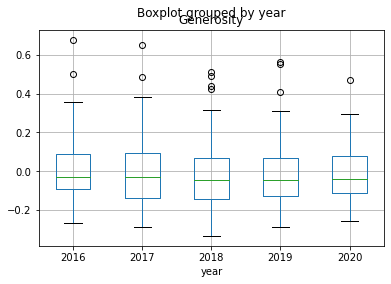

In [15]:
dff.boxplot('Generosity', 'year')
#average generosity is highest in 2017, and remains constant, seeing a slight increase in 2020
#highest generosity score is iin 2020, and has since steadily declined

In [ ]:
ProfileReport(dff).to_notebook_iframe()

In [ ]:
dff.boxplot('Social support', 'year')
